# No Provision

In this strategy, half of the portfolio is in token zero, and the other half is in token one. The assets will not be deposited in any pool. This simple strategy is a good benchmark because it shows how much the value of the tokens increased. Since no liquidity was provided, there is no impermanent loss of earned fees. This strategy will be our reference strategy, which we will take as a baseline.

Import code dependencies


In [1]:
from datetime import date, datetime
import pandas as pd
from demeter import TokenInfo, Actuator, Strategy, ChainType, MarketInfo, AtTimeTrigger
from demeter.result import performance_metrics, round_results
from demeter.uniswap import UniV3Pool, UniLpMarket
from demeter import Snapshot


Set pandas output format

In [2]:
pd.options.display.max_columns = None
pd.set_option("display.width", 5000)

Custom No Provision strategy with nothing in work function.

In [ ]:

class NoProvisionStrategy(Strategy):
    def initialize(self):
        """
        Initialize function will be called right before a backtest start.
        You can do various things here, e.g. register a trigger, or add a simple moving average line.
        """
        new_trigger = AtTimeTrigger(  
            time=datetime(2025, 1, 1, 0, 0, 0), do=self.work
        )  
        self.triggers.append(new_trigger)  

    def work(self, row_data: Snapshot):
            """
            When time is up, work function will be called.
            """
            pass

Main logic to run Actuator

In [6]:

# Declare tokens with names used as units for amounts
usdc = TokenInfo(name="usdc", decimal=6)
eth = TokenInfo(name="eth", decimal=18)

# Initialize Uniswap V3 Pool with parameters matching on-chain pool
pool = UniV3Pool(token0=usdc, token1=eth, fee=0.05, quote_token=usdc)

# Define market key and create Uniswap V3 market
market_key = MarketInfo("market1")
market = UniLpMarket(market_key, pool)

# Load data for the market
market.data_path = "../data"
market.load_data(
    chain="ethereum",
    contract_addr="0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640",
    start_date=date(2025, 1, 1),
    end_date=date(2025, 3, 1)
)

# Initialize Actuator to manage the process
actuator = Actuator()
actuator.broker.add_market(market)

# Set initial fund balance for broker
actuator.broker.set_balance(usdc, 5000)
actuator.broker.set_balance(eth, 1)

# Assign No Provision strategy to the Actuator
actuator.strategy = NoProvisionStrategy()

# Load price data from the Uniswap pool and set it for the Actuator
actuator.set_price(market.get_price_from_data())

# Run the test and print performance results
actuator.run()
print(round_results(performance_metrics(actuator.account_status_df["net_value"], benchmark=actuator.account_status_df["price"]["ETH"])))

# Save results to the specified path
actuator.save_result(
    path="./result",
    account=True,
    actions=True
)

2025-03-11 07:14:44,062 - INFO - Uni data - Load data from cache
2025-03-11 07:14:44,182 - INFO - Actuator - Quote token is USDC
2025-03-11 07:14:44,182 - INFO - Actuator - init strategy...
2025-03-11 07:14:44,185 - INFO - Actuator - start main loop...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 86400/86400 [00:41<00:00, 2096.04it/s]
2025-03-11 07:15:25,411 - INFO - Actuator - main loop finished
2025-03-11 07:15:28,185 - INFO - Actuator - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :5000                     ETH       :1                        
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
Empty DataFrame


Quote by: USDC
Account balance history                           


2025-03-11 07:15:28,511 - INFO - Actuator - Backtest with process id: 1747171 finished, execute time 44.331s


l1                  net_value tokens       market1                                                                                                          price     
l2                              USDC ETH net_value liquidity_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2025-01-01 00:00:00  8331.897   5000   1         0               0                0                 0                0                 0              0  3331.897    1
2025-01-01 00:01:00 8331.5638   5000   1         0               0                0                 0                0                 0              0 3331.5638    1
2025-01-01 00:02:00  8331.897   5000   1         0               0                0                 0                0                 0              0  3331.897    1
2025-01-01 00:03:00 8333.5633   5000   1         0               0                0                 0                0                 0              0 3333.5633    

2025-03-11 07:15:29,479 - INFO - Actuator - files have saved to ./result/backtest-20250311-071528.pkl,./result/backtest-20250311-071528.account.csv


['./result/backtest-20250311-071528.pkl',
 './result/backtest-20250311-071528.account.csv']

Run actuator with evaluators and save result to files

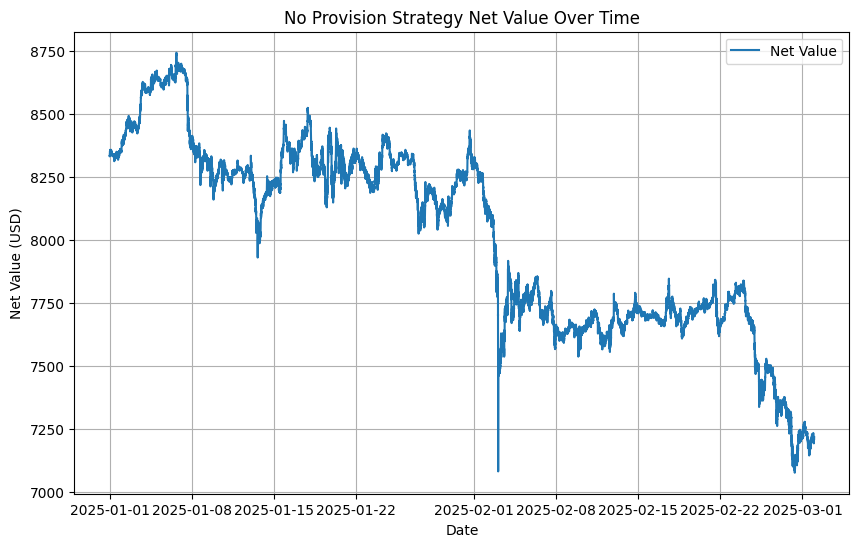

In [8]:
import matplotlib.pyplot as plt

# Plot the net_value of the strategy over time
plt.figure(figsize=(10, 6))
plt.plot(actuator.account_status_df.index, actuator.account_status_df["net_value"], label="Net Value")
plt.xlabel("Date")
plt.ylabel("Net Value (USD)")
plt.title("No Provision Strategy Net Value Over Time")
plt.legend()
plt.grid(True)
plt.show()
